<a href="https://colab.research.google.com/github/rohiv3/rohithadatastories/blob/main/copy_of_automated_loan_elgibility_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/Users/apple/Desktop/MIS 637 Project/loan_sanction_train.csv')
test = pd.read_csv('/Users/apple/Desktop/MIS 637 Project/loan_sanction_test.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


LoanAmount is right skewed so mean>median. Hence it's better to use median
Loan_Amounnt_Term is left skewed mean is a better stratergy

In [ ]:
ct = pd.crosstab(df['Gender'],df['Married'],values=df['Loan_Status'], aggfunc='count')

In [ ]:
ct

Married,No,Yes
Gender,,
Female,80,31
Male,130,357


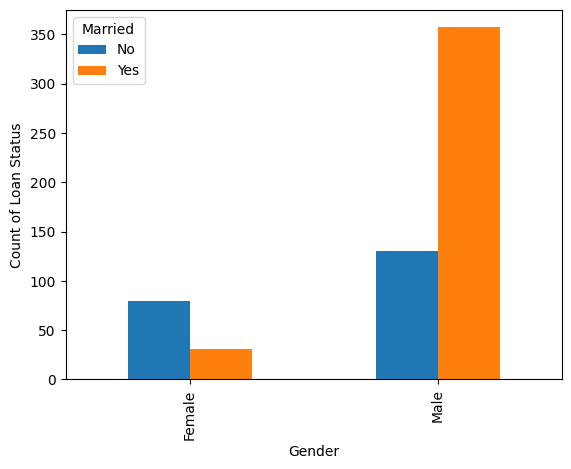

In [ ]:
ax = ct.plot.bar()
ax.set_xlabel('Gender')
ax.set_ylabel('Count of Loan Status')
plt.show()

<AxesSubplot: >

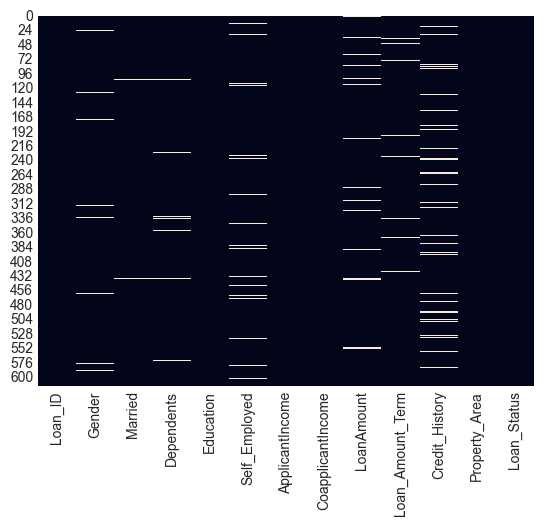

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

'the median loan amount for both groups is relatively similar, with graduates having a slightly higher median loan amount than non-graduates. \nHowever, we can also see that the spread of loan amounts is wider for graduates, with a longer whisker and more outliers in the graduate group.\nThis suggests that while graduates may be taking out larger loans on average, there is also more variability in the loan amounts being taken out by this group. \nNon-graduates, on the other hand, tend to take out smaller loans overall, with less variability in the loan amounts.\n'

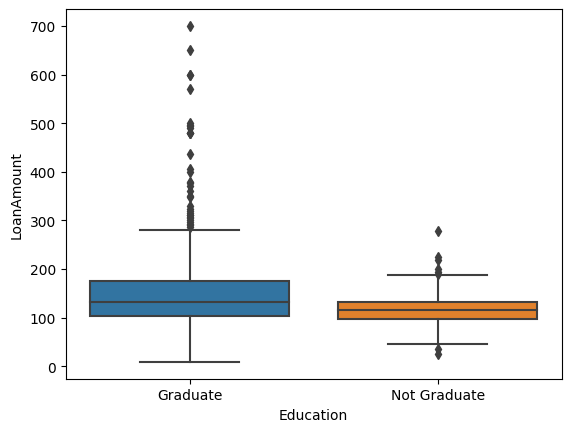

In [ ]:
sns.boxplot(x='Education', y='LoanAmount', data=df)
'''the median loan amount for both groups is relatively similar, with graduates having a slightly higher median loan amount than non-graduates.
However, we can also see that the spread of loan amounts is wider for graduates, with a longer whisker and more outliers in the graduate group.
This suggests that while graduates may be taking out larger loans on average, there is also more variability in the loan amounts being taken out by this group.
Non-graduates, on the other hand, tend to take out smaller loans overall, with less variability in the loan amounts.
'''

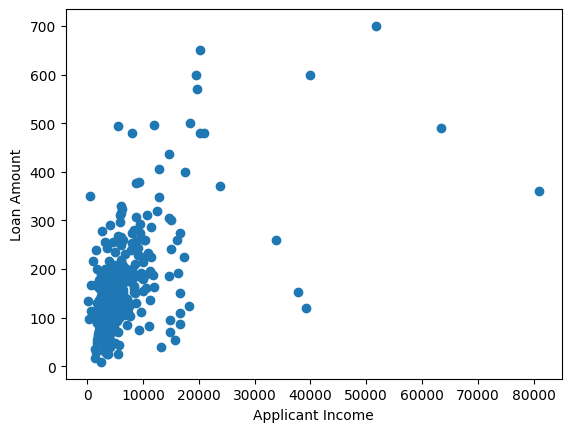

'Looking at the plot, we can see that there is a positive correlation between applicant income and loan amount, \nwhich means that as applicant income increases, the loan amount tends to increase as well. \nThis relationship appears to be relatively strong, as the points are clustered closely together along a diagonal line that slopes upward from left to right.\nHowever, we can also see that there is a lot of variability in the loan amounts for any given applicant income level, \nas there are points spread out in all directions around the trend line. \nThis suggests that while income is a factor in determining the size of loans that applicants can obtain, there are also other factors at play that can influence the loan amount.'

In [ ]:
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()
'''Looking at the plot, we can see that there is a positive correlation between applicant income and loan amount,
which means that as applicant income increases, the loan amount tends to increase as well.
This relationship appears to be relatively strong, as the points are clustered closely together along a diagonal line that slopes upward from left to right.
However, we can also see that there is a lot of variability in the loan amounts for any given applicant income level,
as there are points spread out in all directions around the trend line.
This suggests that while income is a factor in determining the size of loans that applicants can obtain, there are also other factors at play that can influence the loan amount.'''

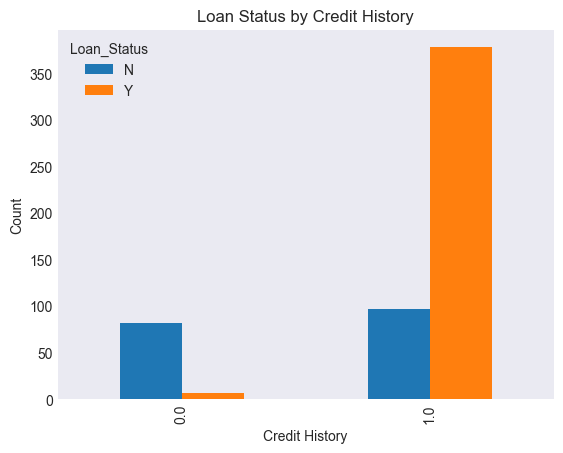

In [ ]:
Credit_History_loan_data=df[['Credit_History', 'Loan_Status']].groupby(['Credit_History', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
fig, ax = plt.subplots()
Credit_History_loan_data.pivot(index='Credit_History', columns='Loan_Status', values='Count').plot(kind='bar', ax=ax)

# set the labels and title
ax.set_xlabel('Credit History')
ax.set_ylabel('Count')
ax.set_title('Loan Status by Credit History')

# show the chart
plt.show()

'''we can see the Loan approvals are more in case of Applicants having Credit History. So, this fearue has significant impact on Loan Status'''

/var/folders/m3/3hn5yzpj7x3g6p2qhbyhpd9w0000gn/T/ipykernel_74292/1291166383.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


'\nA graduate has a 70% chance of being able to take out a mortgage against 61% for a non-graduate. \nWe can therefore assume that the fact of being a graduate or not has no real impact on the authorization of the loan.\n'

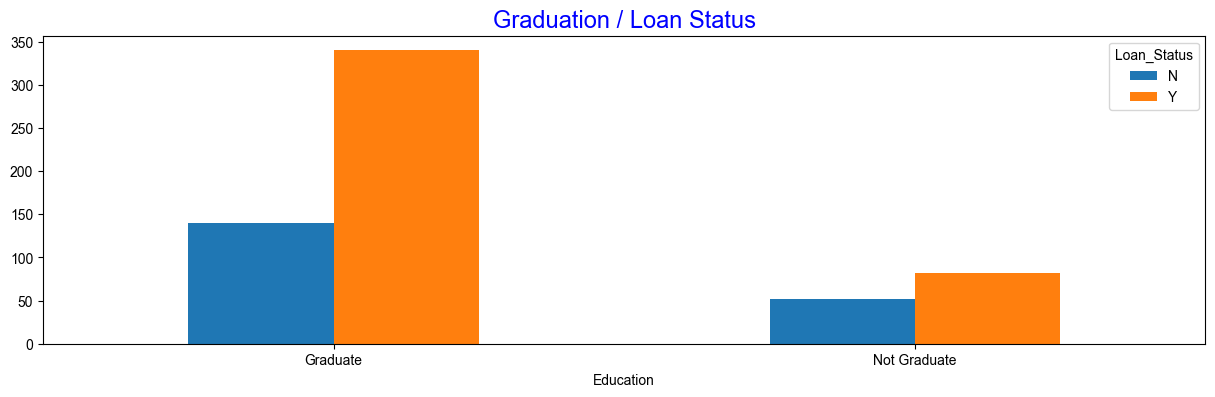

In [ ]:
pd.crosstab(df.Education, df.Loan_Status).plot(kind = 'bar', figsize = [15,4])
plt.title('Graduation / Loan Status', color = 'blue', size = 17)
plt.style.use('seaborn-dark')
# plt.grid()
plt.xticks(rotation = 0);

pd.crosstab(df.Education, df.Loan_Status)
'''
A graduate has a 70% chance of being able to take out a mortgage against 61% for a non-graduate.
We can therefore assume that the fact of being a graduate or not has no real impact on the authorization of the loan.
'''

/var/folders/m3/3hn5yzpj7x3g6p2qhbyhpd9w0000gn/T/ipykernel_74292/2938062539.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


'loan Anount is highly correlated with Applicant income and co-applicant income but applicant and co-applicant income are negatively correlated'

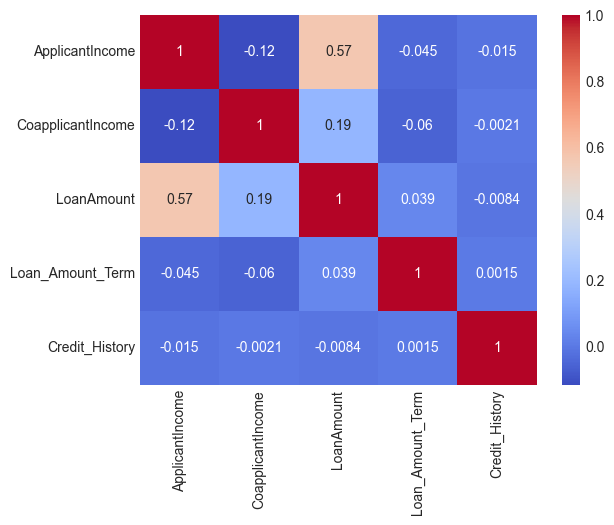

In [ ]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

'''
This is the corelation between the numerical columns
loan Anount is highly correlated with Applicant income and co-applicant income but applicant and co-applicant income are negatively correlated

'''

<AxesSubplot: xlabel='Loan_Status', ylabel='count'>

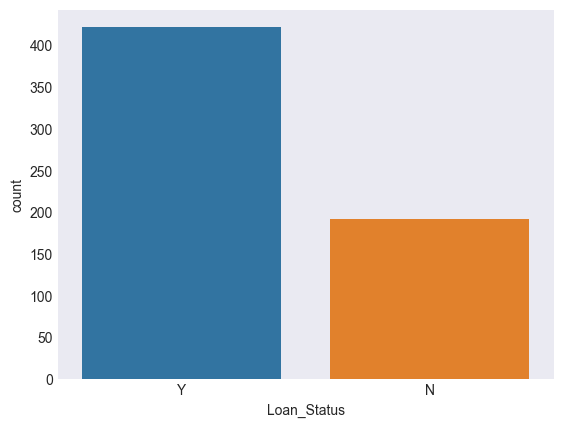

In [ ]:
sns.countplot(x=df['Loan_Status'])

'''
As we can see from the graph that the target column has almost about 50% more yes values.
Hence the data seems imbalanced.
To balance the data we use SMOTE ENN to try avoid bias in our predictions
'''

as we can see that the data is very unbalanced and we need to resample the dataset to make it balanced

# Missing Values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#replacing the missing values of the categorical variables with the mode of that columns in both train and test dataset
def clean_non_numeric_columns(df):
    non_numeric_cols = df.select_dtypes(exclude='number').columns
    non_numeric_df = df[non_numeric_cols]
    mode_values = non_numeric_df.mode().iloc[0]
    cleaned_non_numeric_df = non_numeric_df.fillna(value=mode_values)
    numeric_cols = df.select_dtypes(include='number').columns
    cleaned_df = pd.concat([df[numeric_cols], cleaned_non_numeric_df], axis=1)

    return cleaned_df
df = clean_non_numeric_columns(df)
test = clean_non_numeric_columns(test)

In [ ]:
test.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Property_Area         0
dtype: int64

In [ ]:
#replacing values in training data
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].replace({'No': 0, 'Yes': 1})
df['Loan_Status'] = df['Loan_Status'].replace({'N': 0, 'Y': 1})
df['Dependents'] = df['Dependents'].replace({'3+':3})
df=df.drop('Loan_ID', axis=1)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,NaN,360.0,1.0,1,0,0,1,0,Urban,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,1,0,Rural,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,1,Urban,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,Urban,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,1,0,Rural,1
610,4106,0.0,40.0,180.0,1.0,1,1,3,1,0,Rural,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,1,0,Urban,1
612,7583,0.0,187.0,360.0,1.0,1,1,2,1,0,Urban,1


In [ ]:
#replacing values in testing data
test['Gender'] = test['Gender'].replace({'Male': 1, 'Female': 0})
test['Married'] = test['Married'].replace({'Yes': 1, 'No': 0})
test['Education'] = test['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 0, 'Yes': 1})
test['Dependents'] = test['Dependents'].replace({'3+':3})
test=test.drop('Loan_ID', axis=1)
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5720,0,110.0,360.0,1.0,1,1,0,1,0,Urban
1,3076,1500,126.0,360.0,1.0,1,1,1,1,0,Urban
2,5000,1800,208.0,360.0,1.0,1,1,2,1,0,Urban
3,2340,2546,100.0,360.0,NaN,1,1,2,1,0,Urban
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,1,1,3,0,1,Urban
363,4158,709,115.0,360.0,1.0,1,1,0,1,0,Urban
364,3250,1993,126.0,360.0,NaN,1,0,0,1,0,Semiurban
365,5000,2393,158.0,360.0,1.0,1,1,0,1,0,Rural


In [ ]:
#replacing the missing values of the numeric columns with median in train and test data
def fill_missing_with_median(df):
    # Select all numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    # Fill missing values with the median of each column
    for col in numeric_cols:
        median = df[col].median()
        df[col] = df[col].fillna(median)

    return df
df = fill_missing_with_median(df)
test = fill_missing_with_median(test)

In [ ]:
df['Dependents'] = df['Dependents'].astype(float)
test['Dependents'] = test['Dependents'].astype(float)

In [ ]:
#encoding the property_area column in both files
def encode_property(df):
    le = LabelEncoder()
    df['Property_Area'] = le.fit_transform(df['Property_Area'])
    return df

encode_property(df)
encode_property(test)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5720,0,110.0,360.0,1.0,1,1,0.0,1,0,2
1,3076,1500,126.0,360.0,1.0,1,1,1.0,1,0,2
2,5000,1800,208.0,360.0,1.0,1,1,2.0,1,0,2
3,2340,2546,100.0,360.0,1.0,1,1,2.0,1,0,2
4,3276,0,78.0,360.0,1.0,1,0,0.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,1,1,3.0,0,1,2
363,4158,709,115.0,360.0,1.0,1,1,0.0,1,0,2
364,3250,1993,126.0,360.0,1.0,1,0,0.0,1,0,1
365,5000,2393,158.0,360.0,1.0,1,1,0.0,1,0,0


In [ ]:
df['Property_Area'].unique()

array([2, 0, 1])

In [ ]:
#Scaling both datas
Xt = df.drop(columns='Loan_Status')
yt = df['Loan_Status']
scaler = MinMaxScaler()
Xt_scaled = scaler.fit_transform(Xt)
test_scaled = scaler.fit_transform(test)

# Feature Selection Methodologies

In [ ]:
# Pearson Correlation
np.random.seed(20)
def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
 # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
 # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
 # feature name
    cor_feature = X.iloc[:, np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
# feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(Xt, yt, len(Xt.columns))
print(str(len(cor_feature)), 'selected features')
cor_feature.reverse()

11 selected features


In [ ]:
k_best_features = 11
# Apply SelectKBest class to extract top k best features
np.random.seed(20)
bestfeatures = SelectKBest(score_func = chi2, k = k_best_features)
fit = bestfeatures.fit(Xt_scaled, yt)
chi_support = fit.get_support()
chi_feature = Xt.loc[:, chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

11 selected features


In [ ]:
# Using RFE

np.random.seed(20)

rfe_selector = RFE(estimator = LogisticRegression(), n_features_to_select = k_best_features, step = 10, verbose = 5)
rfe_selector.fit(Xt_scaled, yt)
rfe_support = rfe_selector.get_support()
rfe_feature = Xt.loc[:, rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

11 selected features


In [ ]:
# Logistic Regression to select k best features

np.random.seed(20)
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty = 'l1', solver = 'liblinear'), max_features = k_best_features)
embeded_lr_selector.fit(Xt_scaled, yt)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = Xt.loc[:, embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

8 selected features


In [ ]:
# Random Forest to select k best features

np.random.seed(20)
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators = 100), max_features = k_best_features)
embeded_rf_selector.fit(Xt, yt)

embeded_rf_support = embeded_rf_selector.get_support()
print(len(embeded_rf_support))
embeded_rf_feature = Xt.loc[:, embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

11
4 selected features


In [ ]:
# Combine selections

feature_selection_df = pd.DataFrame({'Feature': Xt.columns.tolist(), 'Pearson': cor_support, 'Chi-2': chi_support, 'RFE': rfe_support,
                                     'Logistics': embeded_lr_support, 'RandomForest': embeded_rf_support})

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis = 1)

# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total'] , ascending = False)
feature_selection_df.index = range(1, len(feature_selection_df) + 1)
feature_selection_df.head(20)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


,Feature,Pearson,Chi-2,RFE,Logistics,RandomForest,Total
1,CoapplicantIncome,True,True,True,True,True,5
2,LoanAmount,True,True,True,True,True,5
3,Credit_History,True,True,True,True,True,5
4,ApplicantIncome,True,True,True,False,True,4
5,Loan_Amount_Term,True,True,True,True,False,4
6,Gender,True,True,True,True,False,4
7,Married,True,True,True,True,False,4
8,Education,True,True,True,True,False,4
9,Property_Area,True,True,True,True,False,4
10,Dependents,True,True,True,False,False,3


In [ ]:
# Select only the top 9 features selected by a combination of all the models

top_9_only = feature_selection_df['Feature'].values.tolist()[0:9]
top_9_only

['CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'ApplicantIncome',
 'Loan_Amount_Term',
 'Gender',
 'Married',
 'Education',
 'Property_Area']

In [ ]:
X_top = Xt[top_9_only]
X_scaled_9 = scaler.fit_transform(X_top)
X_scaled_9 = pd.DataFrame(X_scaled_9, columns = top_9_only)
X_scaled_9

,CoapplicantIncome,LoanAmount,Credit_History,ApplicantIncome,Loan_Amount_Term,Gender,Married,Education,Property_Area
0,0.000000,0.172214,1.0,0.070489,0.743590,1.0,0.0,1.0,1.0
1,0.036192,0.172214,1.0,0.054830,0.743590,1.0,1.0,1.0,0.0
2,0.000000,0.082489,1.0,0.035250,0.743590,1.0,1.0,1.0,1.0
3,0.056592,0.160637,1.0,0.030093,0.743590,1.0,1.0,0.0,1.0
4,0.000000,0.191027,1.0,0.072356,0.743590,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
609,0.000000,0.089725,1.0,0.034014,0.743590,0.0,0.0,1.0,0.0
610,0.000000,0.044863,1.0,0.048930,0.358974,1.0,1.0,1.0,0.0
611,0.005760,0.353111,1.0,0.097984,0.743590,1.0,1.0,1.0,1.0
612,0.000000,0.257598,1.0,0.091936,0.743590,1.0,1.0,1.0,1.0


In [ ]:
top_9_only

['CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'ApplicantIncome',
 'Loan_Amount_Term',
 'Gender',
 'Married',
 'Education',
 'Property_Area']

In [ ]:
# Check if data is imbalanced --> it is

yt.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# analysis on smote ENN

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled_9, yt, test_size = 0.3, random_state = 55)

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_SENN, y_train_SENN = smote_enn.fit_resample(X_train, y_train)

In [ ]:
test = test[top_9_only]
new_test = scaler.fit_transform(test)
new_test = pd.DataFrame(new_test, columns = top_9_only)
new_test

,CoapplicantIncome,LoanAmount,Credit_History,ApplicantIncome,Loan_Amount_Term,Gender,Married,Education,Property_Area
0,0.000000,0.157088,1.0,0.078865,0.746835,1.0,1.0,1.0,1.0
1,0.062500,0.187739,1.0,0.042411,0.746835,1.0,1.0,1.0,1.0
2,0.075000,0.344828,1.0,0.068938,0.746835,1.0,1.0,1.0,1.0
3,0.106083,0.137931,1.0,0.032263,0.746835,1.0,1.0,1.0,1.0
4,0.000000,0.095785,1.0,0.045168,0.746835,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
362,0.074042,0.162835,1.0,0.055274,0.746835,1.0,1.0,0.0,1.0
363,0.029542,0.166667,1.0,0.057329,0.746835,1.0,1.0,1.0,1.0
364,0.083042,0.187739,1.0,0.044810,0.746835,1.0,0.0,1.0,0.5
365,0.099708,0.249042,1.0,0.068938,0.746835,1.0,1.0,1.0,0.0


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Apply SMOTE-ENN to balance the training data
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_scaled_9, yt)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)
def decision_tree(X_train, y_train, X_test, y_test):
    # Initialize the model
    dec_tree = DecisionTreeClassifier()
    # Fit the model on the resampled training data
    d_tree = dec_tree.fit(X_train, y_train)
    # Predict the labels values using the testing data
    y_pred = dec_tree.predict(X_test)
    # Evaluate the model
    dtree_accuracy = accuracy_score(y_test, y_pred)
    dtree_classification_report = classification_report(y_test, y_pred)
    dtree_f1 = f1_score(y_test, y_pred)
    # Print the metrics
    print("Accuracy: ", dtree_accuracy)
    print('\n')
    print("F1 Score: ", dtree_f1)
    print('\n')
    print("Confusion Matrix :")
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print("Classification Report: \n", dtree_classification_report)
return d_tree, dec_tree
# Fit the decision tree classifier on the resampled training data and evaluate it on the testing data
d_tree, dec_tree = decision_tree(X_train, y_train, X_test, y_test)
# Predict on the new test set
y_pred_new_test = dec_tree.predict(new_test)

Accuracy:  0.8976377952755905


F1 Score:  0.8907563025210085


Confusion Matrix :
[[61  8]
 [ 5 53]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        69
           1       0.87      0.91      0.89        58

    accuracy                           0.90       127
   macro avg       0.90      0.90      0.90       127
weighted avg       0.90      0.90      0.90       127



,CoapplicantIncome,LoanAmount,Credit_History,ApplicantIncome,Loan_Amount_Term,Gender,Married,Education,Property_Area
0,0.060096,0.215630,0.0,0.035696,0.743590,1.0,1.0,1.0,0.5
1,0.000000,0.096961,0.0,0.041558,0.743590,0.0,0.0,1.0,1.0
2,0.000000,0.137482,0.0,0.092888,0.743590,1.0,1.0,0.0,1.0
3,0.045864,0.154848,0.0,0.030303,0.743590,1.0,1.0,0.0,0.5
4,0.046008,0.149059,0.0,0.039765,0.743590,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
417,0.079199,0.192475,1.0,0.045875,0.358974,1.0,1.0,1.0,0.0
418,0.000000,0.363242,1.0,0.197526,0.743590,1.0,1.0,1.0,1.0
419,0.000000,0.704776,1.0,0.146568,0.743590,0.0,1.0,1.0,0.5
420,0.046800,0.143271,1.0,0.038120,0.743590,1.0,1.0,1.0,0.0


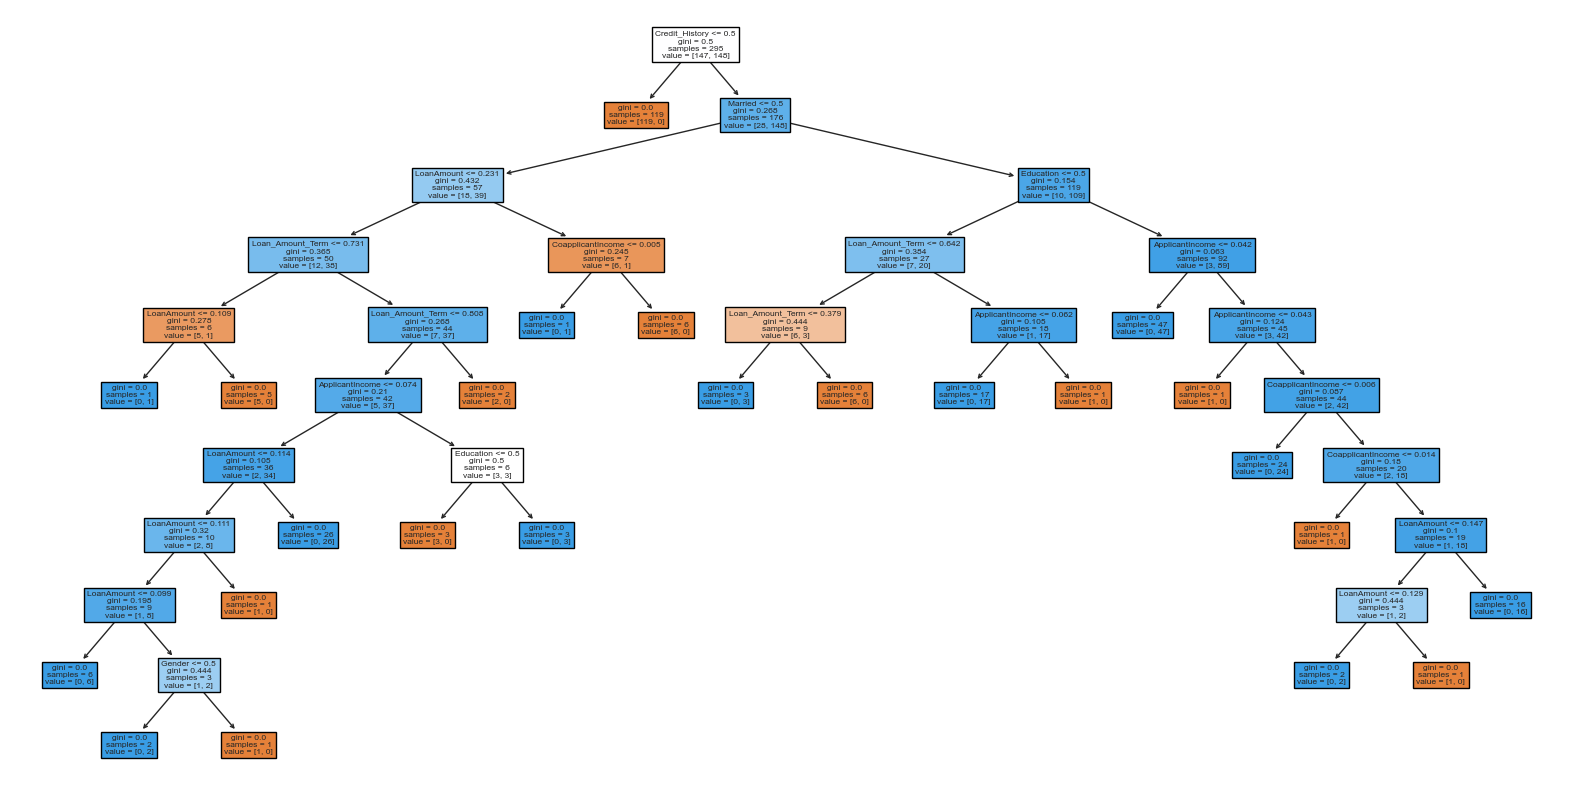

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# plot decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(d_tree, ax=ax, filled=True, feature_names=X_scaled_9.columns)
plt.show()


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_scaled_9, yt)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

def adaboost(X_train_resampled, X_test, y_train_resampled, y_test):
    # Initializing the model
    adaboost = AdaBoostClassifier()
    # Fitting the model on resampled training data
    adaboost_classifier = adaboost.fit(X_train_resampled, y_train_resampled)
    # Predicting the labels values using the test data
    y_pred = adaboost.predict(X_test)
    # Evaluating the model
    adaboost_accuracy = accuracy_score(y_pred, y_test)
    adaboost_classification_report = classification_report(y_pred, y_test)
    adaboost_f1 = f1_score(y_pred, y_test)
    # Printing the metrics
    print("Accuracy: ", adaboost_accuracy)
    print('\n')
    print("F1 Score: ", adaboost_f1)
    print('\n')
    print("Confusion Matrix :")
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print("Classification Report: \n", adaboost_classification_report)
    return adaboost_classifier,adaboost

adaboost_classifier,adaboost = adaboost(X_train, X_test, y_train, y_test)

y_pred_new_test = adaboost.predict(new_test)


Accuracy:  0.889763779527559


F1 Score:  0.8852459016393444


Confusion Matrix :
[[59 10]
 [ 4 54]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.89        63
           1       0.93      0.84      0.89        64

    accuracy                           0.89       127
   macro avg       0.89      0.89      0.89       127
weighted avg       0.89      0.89      0.89       127



In [ ]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_scaled_9, yt)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)
def mlp_classifier(X_train, y_train, X_val, y_val):
    # Initializing the model
    mlp = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=500, activation='relu', solver='adam', random_state=1)
    # Fitting the model on training data
    mlp.fit(X_train, y_train)
    # Predicting the labels values using the validation data
    y_pred = mlp.predict(X_val)
    # Evaluating the model
    mlp_accuracy = accuracy_score(y_val, y_pred)
    mlp_classification_report = classification_report(y_val, y_pred)
    mlp_f1 = f1_score(y_val, y_pred)
    # Printing the metrics
    print("Accuracy: ", mlp_accuracy)
    print('\n')
    print("F1 Score: ", mlp_f1)
    print('\n')
    print("Confusion Matrix :")
    print(confusion_matrix(y_val, y_pred))
    print('\n')
    print("Classification Report: \n", mlp_classification_report)
return mlp
mlp = mlp_classifier(X_train, y_train, X_test, y_test)

# Predicting on the test set
y_pred_test = mlp.predict(new_test)


Accuracy:  0.952755905511811


F1 Score:  0.95


Confusion Matrix :
[[64  5]
 [ 1 57]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.96        69
           1       0.92      0.98      0.95        58

    accuracy                           0.95       127
   macro avg       0.95      0.96      0.95       127
weighted avg       0.95      0.95      0.95       127



Tuned Hyperparameters : {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}
Accuracy: 0.9448818897637795


F1: 0.9481481481481481


Confusion Matrix:
[[64  5]
 [ 2 56]]


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        69
           1       0.92      0.97      0.94        58

    accuracy                           0.94       127
   macro avg       0.94      0.95      0.94       127
weighted avg       0.95      0.94      0.94       127



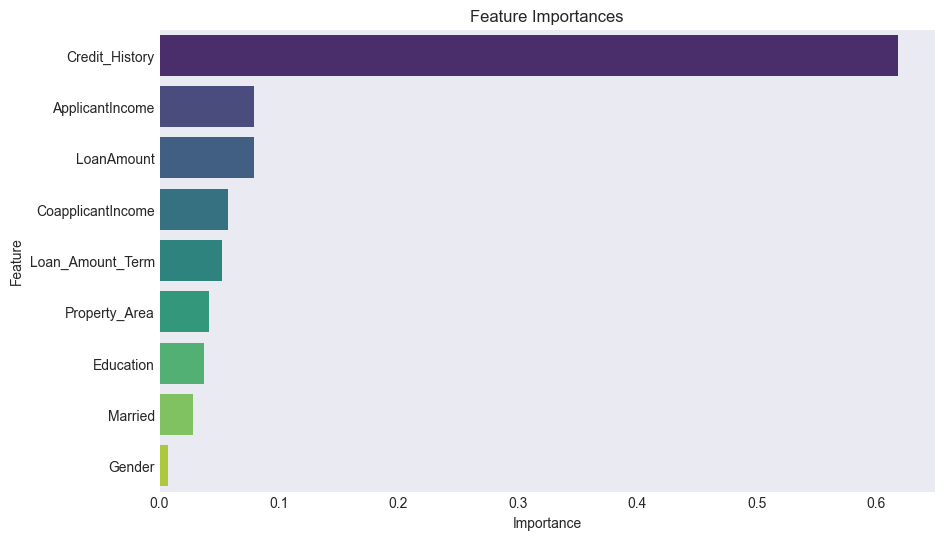

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split

smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_scaled_9, yt)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

def Random_forest(X_train_resampled, X_test, y_train_resampled, y_test):
    param_grid = {
        'n_estimators': [50, 100, 200, 500],
        'max_features': ['sqrt', 'log2'],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 3, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4]
    }

    rf = RandomForestClassifier()
    rand_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10)
    rand_search.fit(X_train_resampled, y_train_resampled)
    best_model = rand_search.best_estimator_
    print('Tuned Hyperparameters :', rand_search.best_params_)
    best_model.fit(X_train_resampled, y_train_resampled) # fitting the model
    y_pred = best_model.predict(X_test)
    best_accuracy = accuracy_score(y_test, y_pred)
    best_f1 = f1_score(y_test, y_pred, pos_label=0)

    print(f'Accuracy: {best_accuracy}')
    print('\n')
    print(f'F1: {best_f1}')
    print('\n')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Get feature importances
    feature_importances = best_model.feature_importances_
    feature_names = X_train_resampled.columns.tolist()
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    importance_df = importance_df.sort_values('importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

    return best_model, rand_search


random_forest_model,rand_search = Random_forest(X_train, X_test, y_train, y_test)
y_pred_test = rand_search.predict(new_test)




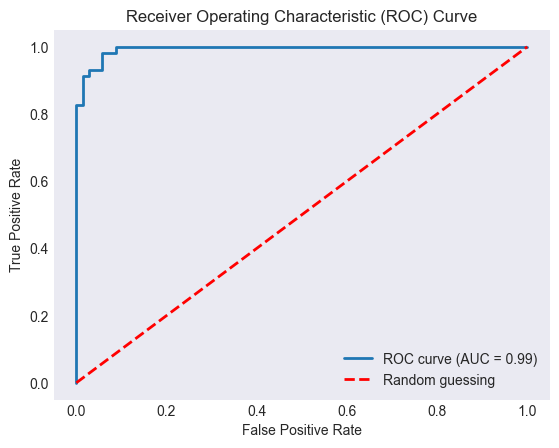

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = random_forest_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guessing')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.984251968503937
F1 score: 0.984251968503937
                        PC1       PC2
CoapplicantIncome -0.017468  0.010446
LoanAmount        -0.016302 -0.002133
Credit_History    -0.535270 -0.723317
ApplicantIncome   -0.002238 -0.004890
Loan_Amount_Term   0.036595 -0.017476
Gender            -0.459481  0.182283
Married           -0.703077  0.439811
Education         -0.008565 -0.498826
Property_Area      0.077835  0.029691


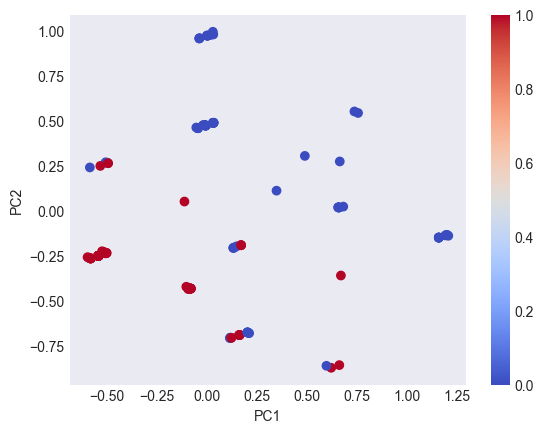

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA

# Define pca globally
pca = PCA(n_components=2)
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_scaled_9, yt)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

def pca_random_forest(X_train, X_test, y_train, y_test):
    # Applying PCA to the training and test data
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Fitting a Random Forest classifier on the transformed data
    rf = RandomForestClassifier()
    rf.fit(X_train_pca, y_train)
    y_pred = rf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    return rf, y_pred, accuracy, f1, X_test_pca
# Fitting the model and evaluating its performance
model, y_pred, accuracy, f1, X_test_pca = pca_random_forest(X_train, X_test, y_train, y_test)

print(f'Accuracy: {accuracy}')
print(f'F1 score: {f1}')

loadings_table = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_scaled_9.columns)
print(loadings_table)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred,cmap='coolwarm')
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np

warnings.filterwarnings('ignore')

# Split the data into training and test sets
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_scaled_9, yt)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

# Logistic Regression with Grid Search CV
def LogisticRegressionGridCV(X_train, X_test, y_train, y_test):
    # Define the parameter grid
    parameters = {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
        'fit_intercept': [True, False],
        'class_weight': ['balanced', {1:0.5, 0:0.5}]
    }

    logreg = LogisticRegression()
    clf = GridSearchCV(logreg,                    # model
                      param_grid=parameters,      # hyperparameters
                      scoring='accuracy',         # metric for scoring
                      cv=3)
    clf.fit(X_train, y_train)
    print('Tuned Hyperparameters:', clf.best_params_)
    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)
    best_accuracy = accuracy_score(y_test, y_pred)
    best_f1 = f1_score(y_test, y_pred, pos_label=0)
    print(f'Accuracy: {best_accuracy}')
    print(f'F1: {best_f1}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    return best_model

lr_gridcv_model = LogisticRegressionGridCV(X_train, X_test, y_train, y_test)


Tuned Hyperparameters: {'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8661417322834646
F1: 0.859504132231405
Confusion Matrix:
[[52 17]
 [ 0 58]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        69
           1       0.77      1.00      0.87        58

    accuracy                           0.87       127
   macro avg       0.89      0.88      0.87       127
weighted avg       0.90      0.87      0.87       127



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# SVM with GridSearchCV

smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_scaled_9, yt)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

def SVMGridSearch(X_train, X_test, y_train, y_test):
    svm_model = SVC(gamma='auto')
    params = {
        'degree': [1, 2, 3, 4, 5],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'probability': [True, False],
        'class_weight': ['balanced', {1:2}]
    }
    svm_grid = GridSearchCV(svm_model, param_grid=params, scoring='accuracy', cv=3)
    svm_grid = svm_grid.fit(X_train, y_train)

    # We obtain the ideal parameters
    print("Tuned Hyperparameters:", svm_grid.best_params_)
    best_model = svm_grid.best_estimator_
    y_pred = best_model.predict(X_test)
    best_accuracy = accuracy_score(y_test, y_pred)
    best_f1 = f1_score(y_test, y_pred, pos_label=0)
    print(f'Accuracy: {best_accuracy}')
    print('\n')
    print(f'F1: {best_f1}')
    print('\n')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    return best_model

svm_grid_model = SVMGridSearch(X_train, X_test, y_train, y_test)


Tuned Hyperparameters: {'class_weight': 'balanced', 'degree': 1, 'kernel': 'linear', 'probability': True}
Accuracy: 0.8661417322834646


F1: 0.859504132231405


Confusion Matrix:
[[52 17]
 [ 0 58]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        69
           1       0.77      1.00      0.87        58

    accuracy                           0.87       127
   macro avg       0.89      0.88      0.87       127
weighted avg       0.90      0.87      0.87       127



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_scaled_9, yt)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

def KNNGridSearchCV(X_train, X_test, y_train, y_test):
    estimator_KNN = KNeighborsClassifier()
    parameters_KNN = {
        'n_neighbors': [3, 5, 11, 19],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'cosine', 'manhattan']
    }

    # with GridSearch
    grid_search_KNN = GridSearchCV(
        estimator=estimator_KNN,
        param_grid=parameters_KNN,
        scoring='accuracy',
        n_jobs=-1,
        cv=10
    )

    grid_search_KNN.fit(X_train, y_train)
    print('Tuned Hyperparameters:', grid_search_KNN.best_params_)
    best_model = grid_search_KNN.best_estimator_
    y_pred = best_model.predict(X_test)
    best_accuracy = accuracy_score(y_test, y_pred)
    best_f1 = f1_score(y_test, y_pred, pos_label=0)
    print(f'Accuracy: {best_accuracy}')
    print('\n')
    print(f'F1: {best_f1}')
    print('\n')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    return best_model

knn_grid_model = KNNGridSearchCV(X_train, X_test, y_train, y_test)


Tuned Hyperparameters: {'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 1.0


F1: 1.0


Confusion Matrix:
[[69  0]
 [ 0 58]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        58

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



In [ ]:
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_scaled_9, yt)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

def NaiveBayes(X_train, X_test, y_train, y_test):
    GNBclf = GaussianNB()
    gnb_model = GNBclf.fit(X_train, y_train)
    y_pred = gnb_model.predict(X_test)
    best_accuracy = accuracy_score(y_test, y_pred)
    best_f1 = f1_score(y_test, y_pred, pos_label=0)

    print(f'Accuracy: {best_accuracy}')
    print(f'F1: {best_f1}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    return gnb_model

gnb_model = NaiveBayes(X_train, X_test, y_train, y_test)


Accuracy: 0.8661417322834646
F1: 0.859504132231405
Confusion Matrix:
[[52 17]
 [ 0 58]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        69
           1       0.77      1.00      0.87        58

    accuracy                           0.87       127
   macro avg       0.89      0.88      0.87       127
weighted avg       0.90      0.87      0.87       127



In [ ]:
# Random Forest with Bagging

smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_scaled_9, yt)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

def BaggingClassifier_predict(X_train, X_test, y_train, y_test):
    # parameters = {
    #     'n_estimators': [5, 10, 20],
    #     'max_samples': [0.5, 1.0],
    #     'max_features': [0.5, 1.0],
    #     'bootstrap': [True, False],
    #     'bootstrap_features': [True, False]
    # }
    rf = RandomForestClassifier()
    bag_clf = BaggingClassifier(base_estimator = rf)
    # clf = GridSearchCV(bag_clf,                    # model
    #                   param_grid = parameters,     # hyperparameters
    #                   scoring='accuracy')          # metric for scoring
    bag_clf.fit(X_train, y_train)
    # print("Tuned Hyperparameters :", clf.best_params_)
    best_model = bag_clf
    y_pred = best_model.predict(X_test)
    best_accuracy = accuracy_score(y_test, y_pred)
    best_f1 = f1_score(y_test, y_pred, pos_label = 0)
    print(f'Accuracy: {best_accuracy}')
    print('\n')
    print(f'F1: {best_f1}')
    print('\n')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    return best_model

bagging_model = BaggingClassifier_predict(X_train, X_test, y_train, y_test)

Accuracy: 0.9448818897637795


F1: 0.9465648854961832


Confusion Matrix:
[[62  7]
 [ 0 58]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        69
           1       0.89      1.00      0.94        58

    accuracy                           0.94       127
   macro avg       0.95      0.95      0.94       127
weighted avg       0.95      0.94      0.94       127



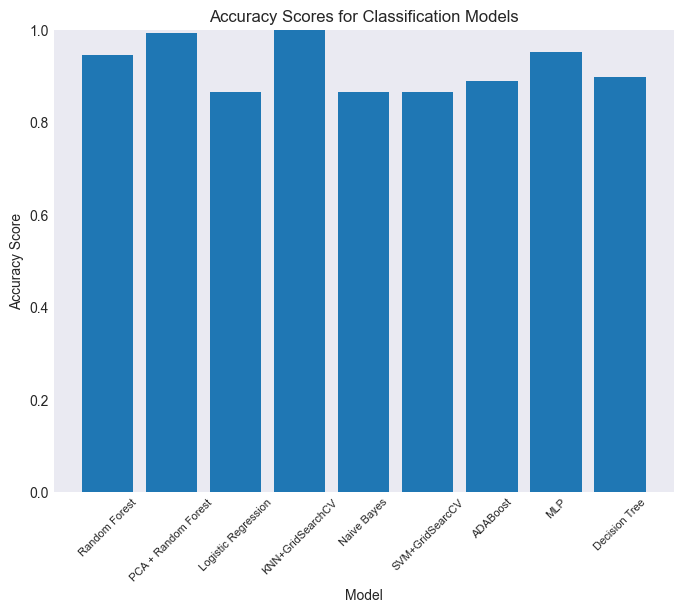

In [ ]:
# Calculate the accuracy scores for each model

rf_acc = accuracy_score(y_test, random_forest_model.predict(X_test))
pca_rf_acc = accuracy_score(y_test, model.predict(X_test_pca))
logreg_acc = accuracy_score(y_test, lr_gridcv_model.predict(X_test))
knn_acc = accuracy_score(y_test, knn_grid_model.predict(X_test))
gnb_acc = accuracy_score(y_test, gnb_model.predict(X_test))
ada_acc = accuracy_score(y_test, adaboost_classifier.predict(X_test))
svm_acc = accuracy_score(y_test, svm_grid_model.predict(X_test))
mlp_acc = accuracy_score(y_test, mlp.predict(X_test))
dt_acc = accuracy_score(y_test, d_tree.predict(X_test))


# Create a bar plot of the accuracy scores
models = ['Random Forest', 'PCA + Random Forest', 'Logistic Regression', 'KNN+GridSearchCV','Naive Bayes','SVM+GridSearcCV','ADABoost','MLP','Decision Tree']
accuracy_scores = [rf_acc, pca_rf_acc, logreg_acc, knn_acc,gnb_acc,svm_acc,ada_acc,mlp_acc,dt_acc]

plt.figure(figsize=(8,6))
plt.bar(models, accuracy_scores)
plt.title('Accuracy Scores for Classification Models')
plt.xlabel('Model')
plt.xticks(rotation = 45,fontsize=8)
plt.ylabel('Accuracy Score')
plt.ylim([0, 1])
plt.show()